<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

# Fast Gradient Boosting Methods

### Preeda Tapiang
* Subsurface Machine Learning Course
* Hildebrand Department of Petroleum and Geosystems Engineering
* Cockrell School of Engineering
* The University of Texas at Austin




Workflow supervised and reviewed by: 
#### Instructor: Prof. Michael Pyrcz, The Univeristy of Texas at Austin
#### Course TA: Lei Liu, Ph.D. Student, The University of Texas at Austin



## Executive Summary
This study aims to compare the Gradient Boosting for regression with the Extreme Gradient Boosting for regression. Analysis of model accuracy and training time, considering variations in learning rate, number of trees, and maximum depth, reveals that the Extreme Gradient Boosting is favored. It shows smoother trends, shorter processing times, and comparable accuracy, making it a preferable choice, especially when adjusting learning rates and the number of trees. However, when the model involves varying maximum depth, the Gradient Boosting might be the more suitable option. Nevertheless, it's important to note that the results are contingent on the computer processing the model and may vary accordingly.

## Objectives 
* To demonstate the workflow steps of the Extreme Gradient Boosting and the Gradient Boosting method 
* To demonstate the affect of various the learning rate, number of trees, and max depth with the Extreme Gradient Boosting and the Gradient Boosting method 
* To compare the process time of various the learning rate, number of trees, and max depth with the Extreme Gradient Boosting and the Gradient Boosting method 





### Citation    
For this workflow I have modified code from Professor Michael Pyrcz (@GeostatsGuy)
https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Gradient_Boosting.ipynb

## Introduction
The Gradient Boosting method is an one of machine learning method for both regression and classification. This method is an ensemble learning method to predict the accurate model. The Gradient Boosting build a weak learner as decision trees. The algorithm calculates the residual on the training data and updates the dataset based on these residuals. This process iterates until convergence is achieved. The Extreme Gradient Boosting (XGBoost) uses for time constraints and enhancing performance in machine learning. This study aims to compare the efficacy of the Extreme Gradient Boosting method and the Gradient Boosting method, considering variations in the number of trees, learning rate, and maximum depth. 
    

## Workflow Steps
   1. Load the required libraries
   2. Import and checked data
   3. Split the data into training data set and testing data set
   4. Training the model with training data and test the model with testing data in with the Gradient Boosting and the Extreme Gradient Boosting
       * Experiment with various learning rates
           * Study training time with various learning rates
       * Experiment with various number of trees
           * Study training time with various number of trees
       * Experiment with various maximum depth
           * Study training time with various maximum depth

### 1. Load the required libraries

In [1]:
import math                                                 # basic calculations like square root
from sklearn import tree                                    # tree program from scikit learn 
from sklearn.tree import _tree                              # for accessing tree information
from sklearn import metrics                                 # measures to check our models
from sklearn.tree import export_graphviz                    # graphical visualization of trees
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0
from sklearn.model_selection import train_test_split        # train and test split

from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.tree import DecisionTreeRegressor              # decision tree method
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor      # tree-based gradient boosting

import pandas as pd                                         # dataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
import geostatspy.GSLIB as GSLIB                            # geostatistics and spatial methods
cmap = plt.cm.inferno                                       

import xgboost as xgboost                                   # extreme gradient boosting
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score                  # assess accuracy model
from xgboost import XGBRegressor                            # extreme gradient boosting

import time
from sklearn.metrics import mean_squared_error              # assess accuracy model

import warnings                                             # suppress warning
warnings.filterwarnings("ignore")

np.random.seed(seed = 1111)                                 # set the random number seed

### 2. Import and checked Data

In [2]:
my_data = pd.read_csv("unconv_MV_modified.csv")                      # load data from csv files

In [3]:
my_data.head(n=13)                                          # preview the first 13 rows of the DataFrame

,WellIndex,Por,LogPerm,Perm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,46.773514,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,44.668359,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,104.712855,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,13.803843,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,67.608298,2.57,43.75,1.40,2.11,5261.094919
5,6,19.47,2.04,109.647820,2.73,54.37,1.42,2.12,5497.005506
6,7,12.70,1.30,19.952623,3.70,43.03,0.45,1.95,1784.266285
7,8,14.15,1.23,16.982437,2.53,39.43,0.79,1.54,1943.639213
8,9,16.18,1.34,21.877616,3.45,45.79,0.56,1.95,3176.523611
9,10,20.51,2.48,301.995172,2.78,28.99,1.78,2.24,2522.792318


#### Check the summary statistics. 

In [4]:
my_data = my_data.iloc[:,1:9]                            # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                           # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.650000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.580000
Perm,1000.0,39.032654,46.293526,1.318257,13.489629,24.547089,47.863009,380.189396
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.700000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.722500,49.680000,59.170000,93.470000
TOC,1000.0,1.003810,0.504978,-0.260000,0.640000,0.995000,1.360000,2.710000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.900000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.644130


#### Brittle and TOC have a negative value. They need to truncate negative value to 0

In [5]:
num = my_data._get_numeric_data()                           # get the numerical values
num[num < 0] = 0                                            # truncate negative values to 0.0
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.650000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.580000
Perm,1000.0,39.032654,46.293526,1.318257,13.489629,24.547089,47.863009,380.189396
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.700000
Brittle,1000.0,49.731480,15.033593,0.000000,39.722500,49.680000,59.170000,93.470000
TOC,1000.0,1.006170,0.499838,0.000000,0.640000,0.995000,1.360000,2.710000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.900000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.644130


### 3. Split the data into training data set and testing data set

I aim to use the basic well logging data such as porosity and permeability to predict the production on this project by splited 20% data for testing purposes

In [6]:
my_data_subset = my_data.iloc[:800,[0,2,7]]                 # extract just por, perm and prod with 20%
my_data_test_subset = my_data.iloc[800:,[0,2,7]]            # extract just por, perm and prod with 80%

#### The summary statistics of training dataset.

In [7]:
my_data_subset.describe().transpose()                       # calculate summary statistics for the traning data

,count,mean,std,min,25%,50%,75%,max
Por,800.0,14.935712,3.047366,5.400000,12.830000,14.920000,17.042500,24.650000
Perm,800.0,39.688048,48.627459,1.513561,13.489629,24.547089,47.863009,380.189396
Production,800.0,2239.464804,1483.781206,2.713535,1186.291283,1975.619101,3027.266883,12568.644130


#### The summary statistics of test dataset.

In [8]:
my_data_test_subset.describe().transpose()                       # calculate summary statistics for the testing data

,count,mean,std,min,25%,50%,75%,max
Por,200.0,15.009450,2.964420,6.550000,12.935000,15.130000,17.402500,23.550000
Perm,200.0,36.411081,35.436268,1.318257,13.803843,24.832977,46.247367,194.984460
Production,200.0,2278.619827,1386.535170,99.834865,1216.021923,1978.728609,2963.809019,6934.576348


#### Check the univariate statistics of Porosity, Permeability and Producton.

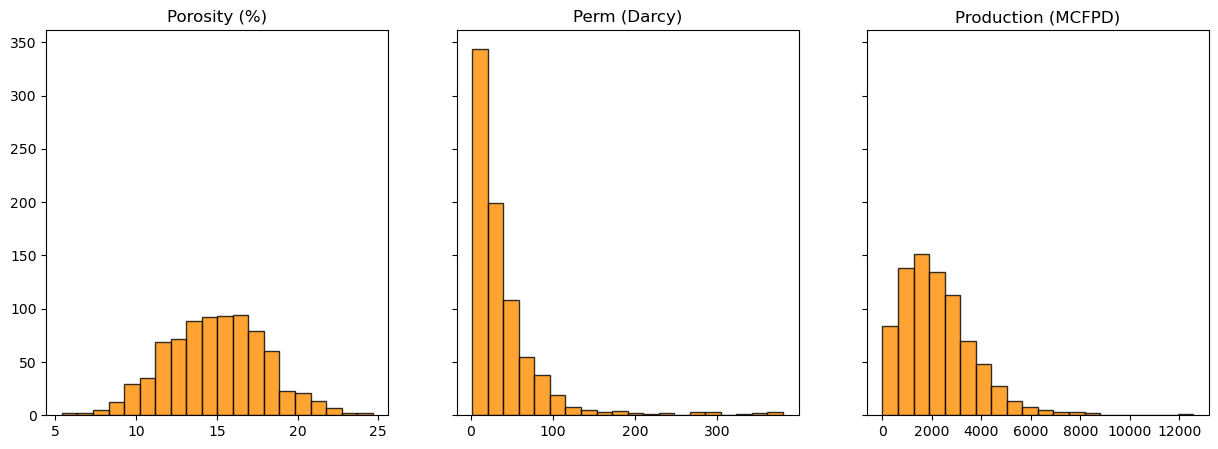

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5)) # plot histograms
ax1.hist(my_data_subset["Por"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax1.set_title('Porosity (%)')
ax2.hist(my_data_subset["Perm"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax2.set_title('Perm (Darcy)')
ax3.hist(my_data_subset["Production"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax3.set_title('Production (MCFPD)')
plt.show()

The distributions are well, there are no gap and truncation.  This is a scatter plot of Porosity vs. Permeability with Production for training data.

#### This is a scatter plots of Porosity vs. Permeability with Production. The scatter plots show that increased porosity and permability correspond to high production

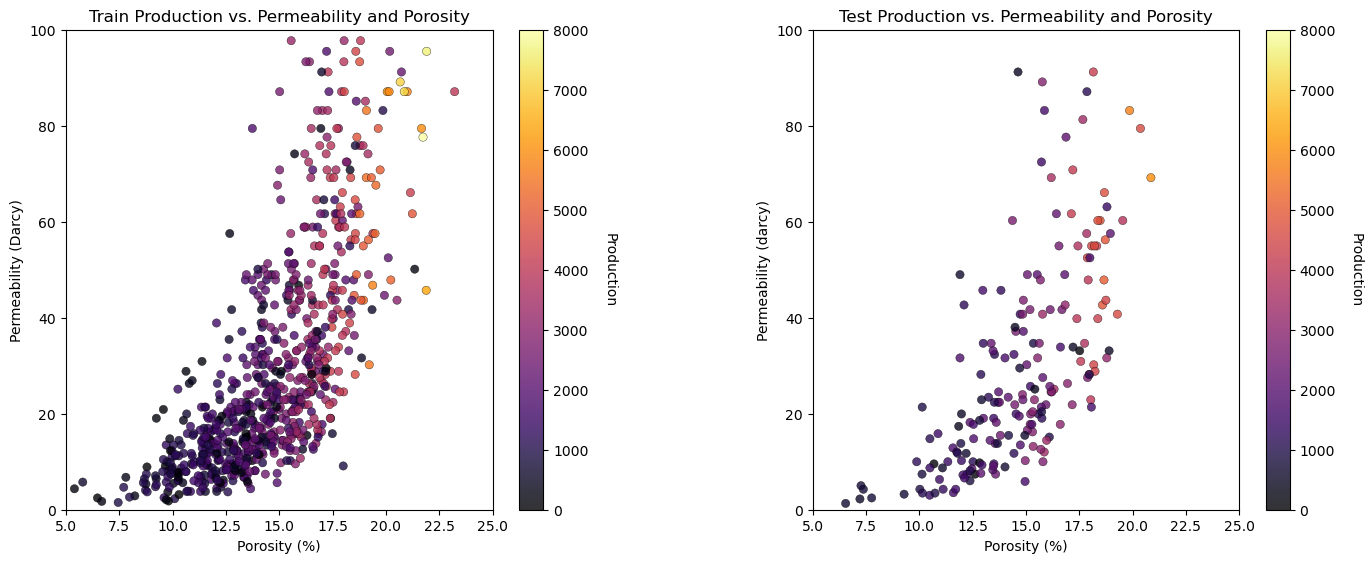

In [10]:
pormin = 5.0; pormax = 25.0                                 # set minimums and maximums for visualization 
permmin = 0.0; permmax = 100.0
prodmin = 0.0; prodmax = 8000.0

plt.subplot(121)                                  # plot the training data
im = plt.scatter(my_data_subset["Por"],my_data_subset["Perm"],s=None, c=my_data_subset["Production"], marker=None, cmap=cmap, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Train Production vs. Permeability and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (Darcy)')
plt.xlim(pormin,pormax);plt.ylim(permmin,permmax)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(122)                                # plot the testing data
im = plt.scatter(my_data_test_subset["Por"],my_data_test_subset["Perm"],s=None, c=my_data_test_subset["Production"], marker=None, cmap=cmap, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Test Production vs. Permeability and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (darcy)')
plt.xlim(pormin,pormax);plt.ylim(permmin,permmax)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)
 
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.4, hspace=0.3)
plt.show()

#### Separate predictor and response feature dataframes

In [11]:
predictors = my_data_subset[['Por','Perm']].copy()       # make a new DataFrame with predictor features for training
response = my_data_subset[['Production']].copy()            # make a new DataFrame with responses features for training
predictors_test = my_data_test_subset[['Por','Perm']].copy() # make a new DataFrame with predictor features for testing
response_test = my_data_test_subset[['Production']].copy()  # make a new DataFrame with responses for testing

### 4. Training the model with training data and testing the model with testing data

### Experiment with various learning rates
#### I aim to examine the outcomes of adjusting the learning rate in both the Gradient Boosting and the Extreme Gradient Boosting models to optimize for high accuracy.

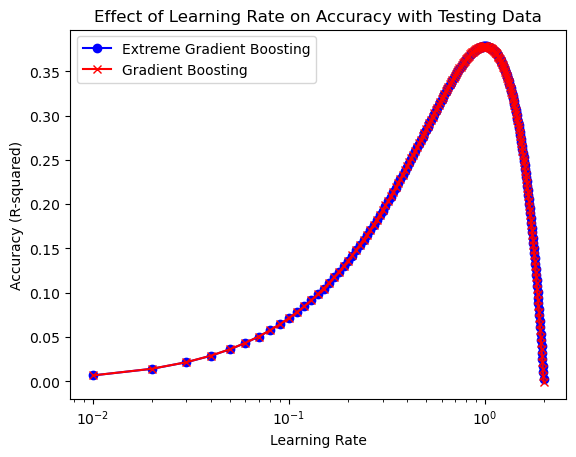

In [12]:
# Gradient Boosting
learning_rates_GB_AC = np.arange(0.01, 2, 0.01)     # specify different learning rates from 0.01 to 2.00, increasing by increments of 0.01
accuracy_scores_LR_GB_AC = []                       # create a loop to calculate the accuracy score for different learning rate and set max depth = 1 and number of trees = 1
for learning_rate in learning_rates_GB_AC:
    params = {
        'loss': 'squared_error',           # loss function = squared error
        'max_depth': 1,                    # max depth = 1
        'learning_rate': learning_rate,    # various learning rate
        'n_estimators': 1                  # number of trees = 1
    }

    model = GradientBoostingRegressor(**params)    # regression model based on gradient boosting
    model.fit(predictors, response)                # train the model with training data
    
    predictions = model.predict(predictors_test)   # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))   # calculate R-squared as a measure of accuracy
    accuracy_scores_LR_GB_AC.append(accuracy)

# Extreme Gradient Boosting
learning_rates_XGB_AC = np.arange(0.01, 2, 0.01)      # specify different learning rates from 0.01 to 2.00, increasing by increments of 0.01
accuracy_scores_LR_XGB_AC = []                        # create a loop to calculate the accuracy score for different learning rate and set max depth = 1 and number of trees = 1
for learning_rate in learning_rates_XGB_AC:
    params = {
        'loss': 'squared_error',            # loss function = squared error
        'max_depth': 1,                     # max depth = 1
        'learning_rate': learning_rate,     # various learning rate
        'n_estimators': 1                   # number of trees = 1
    }

    model = XGBRegressor(**params)          # regression model based on gradient boosting
    model.fit(predictors, response)         # train the model with training data
    
    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions)  # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    accuracy_scores_LR_XGB_AC.append(accuracy)
    
# Plotting
plt.plot(learning_rates_XGB_AC, accuracy_scores_LR_XGB_AC, marker='o', color='blue', label='Extreme Gradient Boosting')
plt.plot(learning_rates_GB_AC, accuracy_scores_LR_GB_AC, marker='x', color='red', label='Gradient Boosting')
plt.xscale('log')  # log scale for better visualization if learning rates vary widely
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (R-squared)')
plt.title('Effect of Learning Rate on Accuracy with Testing Data')
plt.legend()
plt.show()


The plot shows that both of the results is same. The accuracy score demonstrated an upward trend as the learning rate approached 1, with a corresponding decrease when deviating from 1

#### The two methods do not differ significantly. My goal is to investigate the training time in both methods to determine which one is more preferable when I adjust the learning rate.

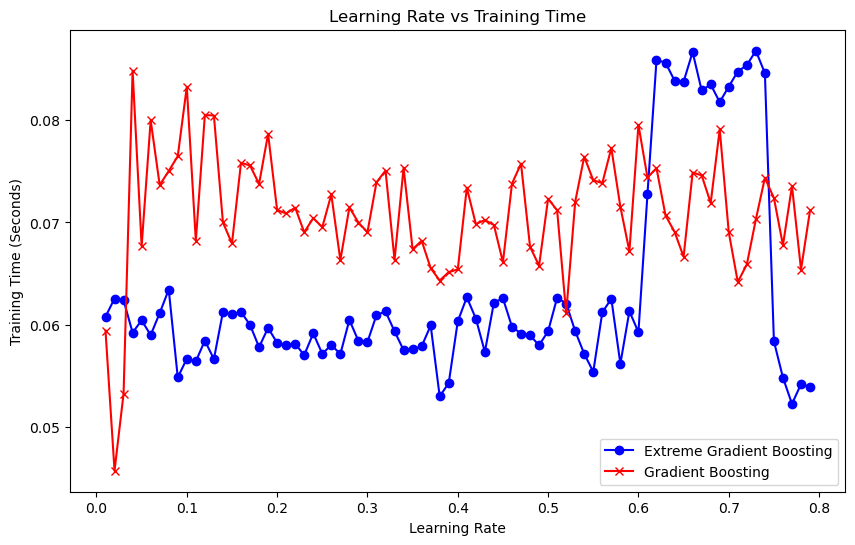

In [13]:
# Gradient Boosting
learning_rates_GB_T = np.arange(0.01, 0.8, 0.01)  # specify different learning rates from 0.01 to 0.8, increasing by increments of 0.01
accuracy_scores_learning_rates_GB_T = []          # create a loop to calculate the accuracy score for different max depth and set number of trees = 1 and learning rate = 0.1
training_times_learning_rates_GB_T = []           # calculate the process time
for learning_rate in learning_rates_GB_T:
    
    all_time_LN_GB_T = []
    for _ in range(20):                           # outcomes might be unclear due to different learning rate, using average time over 20 times instances
        start_time_LN_GB_T = time.time()                  # start time
        params = {
            'loss': 'squared_error',              # loss function = squared error
            'max_depth': 1,                       # max depth = 1
            'learning_rate': learning_rate,       # various learning rate
            'n_estimators': 100                   # number of trees = 100
        }


        model = GradientBoostingRegressor(**params) # regression model based on gradient boosting
        model.fit(predictors_test, response_test)   # train the model with training data

        end_time_LN_GB_T = time.time()                     # end time
        elapsed_time_LN_GB_T = end_time_LN_GB_T - start_time_LN_GB_T       # using time

        predictions = model.predict(predictors_test) # test the trained model on testing data
        mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
        accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
        all_time_LN_GB_T.append(elapsed_time_LN_GB_T)
        
    accuracy_scores_learning_rates_GB_T.append(accuracy)
    elapsed_time_LN_GB_T = np.mean(all_time_LN_GB_T)
    training_times_learning_rates_GB_T.append(elapsed_time_LN_GB_T)   

# Extreme Gradient Boosting
learning_rates_XGB_T = np.arange(0.01, 0.8, 0.01)  # specify different learning rates from 0.01 to 0.8, increasing by increments of 0.01
accuracy_scores_learning_rates_XGB_T = []          # create a loop to calculate the accuracy score for different learning rate and set number of trees = 100 and max depth = 0.1
training_times_learning_rates_XGB_T = []           # calculate the process time
for learning_rate in learning_rates_XGB_T:
        
    all_time_LN_XGB_T = []
    for _ in range(20):                           # outcomes might be unclear due to different learning rate, using average time over 20 times instancess
        start_time_LN_XGB_T = time.time()                  # start time
        params = {
            'loss': 'squared_error',              # loss function = squared error
            'max_depth': 1,                       # max depth = 1
            'learning_rate': learning_rate,       # various learning rate
            'n_estimators': 100                   # number of trees = 100
        }

        
        model = XGBRegressor(**params)            # regression model based on gradient boosting
        model.fit(predictors_test, response_test) # train the model with training data
    
        end_time_LN_XGB_T = time.time()                    # end time
        elapsed_time_LN_XGB_T = end_time_LN_XGB_T - start_time_LN_XGB_T      # using time

        predictions = model.predict(predictors_test)  # test the trained model on testing data
        mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
        accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
        all_time_LN_XGB_T.append(elapsed_time_LN_XGB_T)
    
    accuracy_scores_learning_rates_XGB_T.append(accuracy)
    elapsed_time_LN_XGB_T = np.mean(all_time_LN_XGB_T)
    training_times_learning_rates_XGB_T.append(elapsed_time_LN_XGB_T) 
    
#Plotting
plt.figure(figsize=(10, 6))
plt.plot(learning_rates_XGB_T, training_times_learning_rates_XGB_T, marker='o', color='blue', label='Extreme Gradient Boosting')
plt.plot(learning_rates_GB_T, training_times_learning_rates_GB_T, marker='x', color='red', label='Gradient Boosting')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (Seconds)')
plt.title('Learning Rate vs Training Time')
plt.legend()
plt.show()


The training time for the Gradient boosting is approximately 0.07 seconds. While for the Extrene Gradient boosting, it is approximately 0.06 seconds. The trends of the time decrease as the learning rate increased on the Extreme Gradient Boosting. Conversely, in the Gradient Boosting, time is more fluctuation, with the overall time being shorten in the Extreme Gradient Boosting.

### Experiment with number of trees
#### I aim to examine the outcomes of adjusting the number of trees in both the Gradient Boosting and the Extreme Gradient Boosting models to optimize for high accuracy.

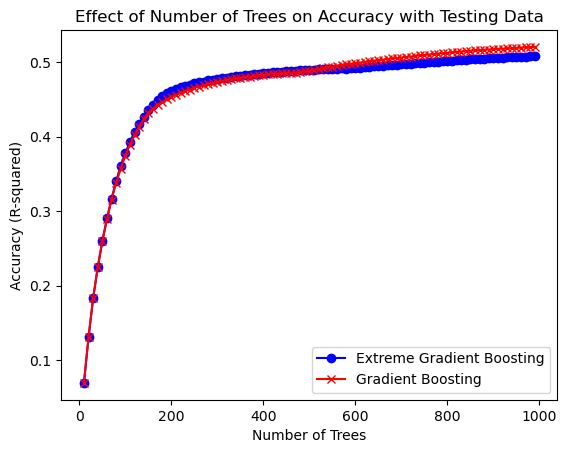

In [14]:
# Gradient Boosting
n_estimators_list_GB_AC = np.arange(10, 1000, 10)  # specify different number of tress from 10 to 1000, increasing by increments of 10
accuracy_scores_NT_GB_AC = []                         # create a loop to calculate the accuracy score for different number of trees and set max depth = 1 and learning rate = 0.1
for n_estimators in n_estimators_list_GB_AC:
    params = {
        'loss': 'squared_error',             # loss function = squared error
        'max_depth': 1,                      # max depth = 1
        'learning_rate': 0.01,               # learning rate = 0.01
        'n_estimators': n_estimators         # various number of trees
    }

    model = GradientBoostingRegressor(**params) # regression model based on gradient boosting
    model.fit(predictors, response)             # train the model with training data
    
    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions)  # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    accuracy_scores_NT_GB_AC.append(accuracy)
    
# Extreme Gradient Boosting
n_estimators_list_XGB_AC = np.arange(10, 1000, 10)  # specify different number of tress from 10 to 1000, increasing by increments of 10
accuracy_scores_NT_XGB_AC = []                         # create a loop to calculate the accuracy score for different number of trees and set max depth = 1 and learning rate = 0.1
for n_estimators in n_estimators_list_XGB_AC:
    params = {
        'loss': 'squared_error',             # loss function = squared error
        'max_depth': 1,                      # max depth = 1
        'learning_rate': 0.01,               # learning rate = 0.01
        'n_estimators': n_estimators         # various number of trees
    }

    model = XGBRegressor(**params)          # regression model based on gradient boosting
    model.fit(predictors, response)         # train the model with training data
    
    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    accuracy_scores_NT_XGB_AC.append(accuracy)              
    
# Plotting
plt.plot(n_estimators_list_XGB_AC, accuracy_scores_NT_XGB_AC, marker='o', color='blue', label='Extreme Gradient Boosting')
plt.plot(n_estimators_list_GB_AC, accuracy_scores_NT_GB_AC, marker='x', color='red', label='Gradient Boosting')
plt.xscale('linear')  
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy (R-squared)')
plt.title('Effect of Number of Trees on Accuracy with Testing Data')
plt.legend()
plt.show()



Between 10 and 500 trees, the Extreme Gradient Boosting demonstrates higher accuracy than Gradient Boosting. However, beyond 500 trees, Gradient Boosting get more accuracy than the Extreme Gradient Boosting.

#### The two methods are quite not different.  My goal is study the training time in both methods to determine which one is more preferable when I adjust the number of trees.

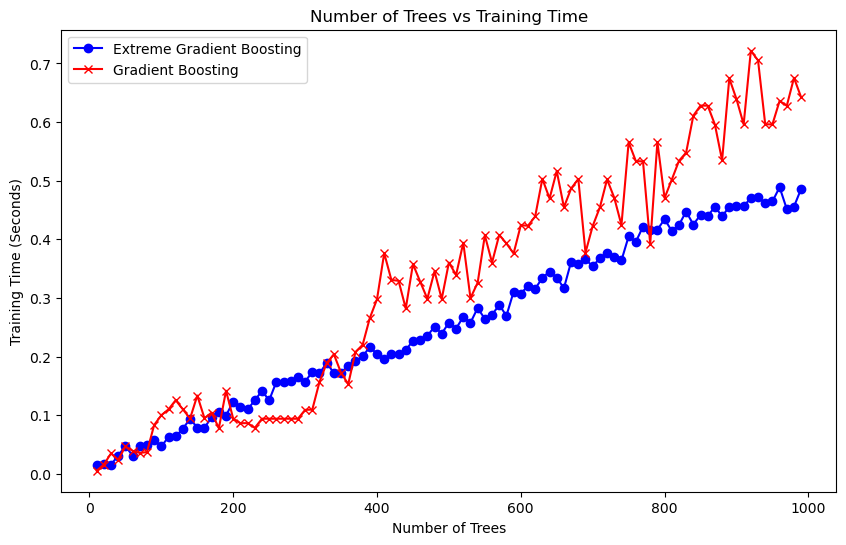

In [15]:
# Gradient Boosting
n_estimators_list_GB_T = np.arange(10, 1000, 10) # specify different number of tress from 10 to 1000, increasing by increments of 10
accuracy_scores_n_estimators_GB_T = []           # create a loop to calculate the accuracy score for different number of trees and set max depth = 1 and learning rate = 0.01
training_times_n_estimators_GB_T = []            # calculate the process time
for n_estimators in n_estimators_list_GB_T:
    
    start_time_NT_GB_T = time.time()             # start time
    params = {
        'loss': 'squared_error',     # loss function = squared error
        'max_depth': 1,              # max depth = 1
        'learning_rate': 0.01,       # learning rate = 0.01
        'n_estimators': n_estimators # various number of trees
    }

        
    model = GradientBoostingRegressor(**params) # regression model based on gradient boosting
    model.fit(predictors_test, response_test)   # train the model with training data
     
    end_time_NT_GB_T = time.time()                                      # end time
    elapsed_time_NT_GB_T = end_time_NT_GB_T - start_time_NT_GB_T        # using time

    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    
    accuracy_scores_n_estimators_GB_T.append(accuracy)
    training_times_n_estimators_GB_T.append(elapsed_time_NT_GB_T)

# Extreme Gradient Boosting
n_estimators_list_XGB_T = np.arange(10, 1000, 10)  # specify different number of tress from 10 to 1000, increasing by increments of 10
accuracy_scores_n_estimators_XGB_T = []            # create a loop to calculate the accuracy score for different number of trees and set max depth = 1 and learning rate = 0.01
training_times_n_estimators_XGB_T = []             # calculate the process time
for n_estimators in n_estimators_list_XGB_T:
    
    start_time_NT_XGB_T = time.time()            # start time
    params = {
        'loss': 'squared_error',        # loss function = squared error
        'max_depth': 1,                 # max depth = 1
        'learning_rate': 0.01,          # learning rate = 0.01
        'n_estimators': n_estimators    # various number of trees
    }

        
    model = XGBRegressor(**params)            # regression model based on gradient boosting
    model.fit(predictors_test, response_test) # train the model with training data
    
    end_time_NT_XGB_T = time.time()                    # end time
    elapsed_time_NT_XGB_T = end_time_NT_XGB_T - start_time_NT_XGB_T      # using time

    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    
    accuracy_scores_n_estimators_XGB_T.append(accuracy)
    training_times_n_estimators_XGB_T.append(elapsed_time_NT_XGB_T)
    
    
#Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list_XGB_T, training_times_n_estimators_XGB_T , marker='o', color='blue', label='Extreme Gradient Boosting')
plt.plot(n_estimators_list_GB_T, training_times_n_estimators_GB_T, marker='x', color='red', label='Gradient Boosting')
plt.xlabel('Number of Trees')
plt.ylabel('Training Time (Seconds)')
plt.title('Number of Trees vs Training Time')
plt.legend()
plt.show()


Both processes showed an increase in time as the number of trees is increasing, However, the Extreme Gradient Boosting demonstrated a shorten and more consistent processing time compared to the Gradient Boosting.

### Experiment with maximum depth
#### I aim to examine the outcomes of adjusting the maximum depth in both the Gradient Boosting and the Extreme Gradient Boosting models to optimize for high accuracy.

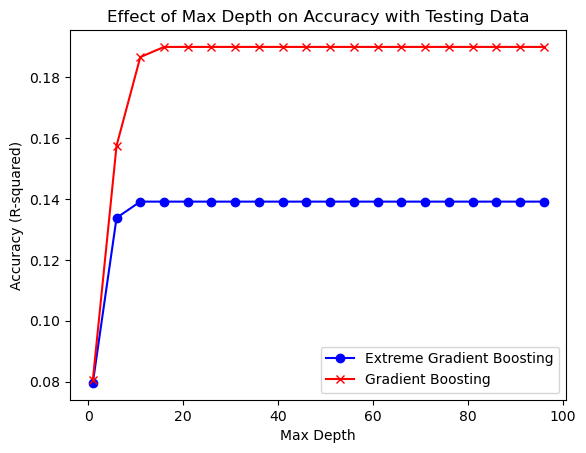

In [16]:
# Gradient Boosting
max_depth_list_GB_AC = np.arange(1, 100, 5)     # specify different max depth from 1 to 100, increasing by increments of 5
accuracy_scores_MD_GB_AC = []                   # create a loop to calculate the accuracy score for different max depth and set number of trees = 1 and learning rate = 0.1
for max_depth in max_depth_list_GB_AC:
    params = {
        'loss': 'squared_error',       # loss function = squared error
        'max_depth': max_depth,        # various max depth
        'learning_rate': 0.1,          # learning rate = 0.01
        'n_estimators': 1              # number of trees = 1
    }

    model = GradientBoostingRegressor(**params) # regression model based on gradient boosting
    model.fit(predictors_test, response_test)   # train the model with training data
    
    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions)  # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # Calculate R-squared as a measure of accuracy
    accuracy_scores_MD_GB_AC.append(accuracy)

# Extreme Gradient Boosting    
max_depth_list_XGB_AC = np.arange(1, 100, 5)       # specify different max depth from 1 to 100, increasing by increments of 5
accuracy_scores_MD_XGB_AC = []                     # create a loop to calculate the accuracy score for different max depth and set number of trees = 1 and learning rate = 0.1
for max_depth in max_depth_list_XGB_AC:
    params = {
        'loss': 'squared_error',         # loss function = squared error
        'max_depth': max_depth,          # various max depth
        'learning_rate': 0.1,            # learning rate = 0.01
        'n_estimators': 1                # number of trees = 1
    }

    model = XGBRegressor(**params)              # regression model based on gradient boosting
    model.fit(predictors_test, response_test)   # train the model with training data
    
    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    accuracy_scores_MD_XGB_AC.append(accuracy)
    
# Plotting
plt.plot(max_depth_list_XGB_AC, accuracy_scores_MD_XGB_AC, marker='o', color='blue', label='Extreme Gradient Boosting')
plt.plot(max_depth_list_GB_AC, accuracy_scores_MD_GB_AC, marker='x', color='red', label='Gradient Boosting')
plt.xscale('linear')  
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (R-squared)')
plt.title('Effect of Max Depth on Accuracy with Testing Data')
plt.legend()
plt.show()


Accuracy is increasing when the max depth approached 20 in the Gradient boosting and remained stable thereafter. The accuracy in the Extreme Gradient Boosting is increasing when max depth approached 16 and remained stable thereafter. However, the Gradient Boosting gave the higher accuracy than the Extreme Gradient Boosting.

#### The two methods are quite different.  My goal aims to study the training time in both methods, focusing on adjusting only the maximum depth, to determine which one is more preferable.

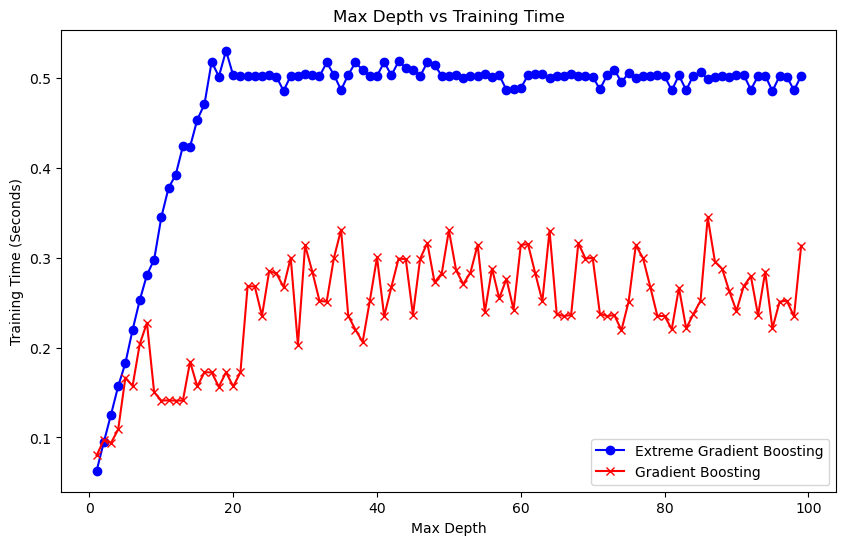

In [17]:
# Gradient Boosting
max_depth_list_GB_T = np.arange(1, 100, 1) # specify different max depth from 1 to 100, increasing by increments of 1
accuracy_scores_max_depth_GB_T = []        # create a loop to calculate the accuracy score for different max depth and set number of trees = 100 and learning rate = 0.01
training_times_max_depth_GB_T = []         # calculate the process time
for max_depth in max_depth_list_GB_T:
    
    start_time_MD_GB_T = time.time()          # start time
    params = {
        'loss': 'squared_error',      # loss function = squared error
        'max_depth': max_depth,       # various max depth
        'learning_rate': 0.01,        # learning rate = 1
        'n_estimators': 100           # number of trees = 100
    }

        
    model = GradientBoostingRegressor(**params)  # regression model based on gradient boosting
    model.fit(predictors_test, response_test)    # train the model with training data
    
    end_time_MD_GB_T = time.time()                                       # end time
    elapsed_time_MD_GB_T = end_time_MD_GB_T - start_time_MD_GB_T         # using time
 
    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    
    accuracy_scores_max_depth_GB_T.append(accuracy)
    training_times_max_depth_GB_T.append(elapsed_time_MD_GB_T)


# Extreme Gradient Boosting
max_depth_list_XGB_T = np.arange(1, 100, 1)  # specify different max depth from 1 to 100, increasing by increments of 1
accuracy_scores_max_depth_XGB_T = []         # create a loop to calculate the accuracy score for different max depth and set number of trees = 100 and learning rate = 0.01
training_times_max_depth_XGB_T = []          # calculate the process time
for max_depth in max_depth_list_XGB_T:
    
    start_time_MD_XGB_T = time.time()               # start time
    params = {
        'loss': 'squared_error',           # loss function = squared error
        'max_depth': max_depth,            # various max depth
        'learning_rate': 0.01,             # learning rate = 1
        'n_estimators': 100                # number of trees = 100
    }

        
    model = XGBRegressor(**params)            # regression model based on gradient boosting
    model.fit(predictors_test, response_test) # train the model with training data
    
    end_time_MD_XGB_T = time.time()                                      # end time
    elapsed_time_MD_XGB_T = end_time_MD_XGB_T - start_time_MD_XGB_T      # using time

    predictions = model.predict(predictors_test)  # test the trained model on testing data
    mse = mean_squared_error(response_test, predictions) # calculate minimum squared error from testing data and prediction model
    accuracy = 1 - (mse / np.var(response_test))  # calculate R-squared as a measure of accuracy
    
    accuracy_scores_max_depth_XGB_T.append(accuracy)
    training_times_max_depth_XGB_T.append(elapsed_time_MD_XGB_T) 
    
#Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depth_list_XGB_T, training_times_max_depth_XGB_T , marker='o', color='blue', label='Extreme Gradient Boosting')
plt.plot(max_depth_list_GB_T, training_times_max_depth_GB_T, marker='x', color='red', label='Gradient Boosting')
plt.xlabel('Max Depth')
plt.ylabel('Training Time (Seconds)')
plt.title('Max Depth vs Training Time')
plt.legend()
plt.show()


The training time for the Gradient boosting is approximately 0.25 seconds. While for the Extrene Gradient boosting, it is approximately 0.50 seconds. The time increased in both method as max depth rose. The Extreme Gradient Boosting exhibited a longer time than the Gradient Boosting.

## Result Summary

I trained the model with training data and tested the model with testing data in the Gradient Boosting and the Extreme Gradient Boosting. The subsequent testing phase was assessed model accuracy by varying the learning rate, number of trees, and max depth.

1. Experiment with various learning rates
    * The plot shows the accuracy of various learning rate similarly. The accuracy score demonstrated an upward trend as the learning rate approached 1, with a corresponding decrease when deviating from 1. The trends of the time decrease as the learning rate increased on the Extreme Gradient Boosting. Conversely, in the Gradient Boosting, time is more fluctuation, with the overall time being shorten in the Extreme Gradient Boosting.

2. Experiment with number of trees
    * Between 10 and 500 trees, the Extreme Gradient Boosting demonstrates higher accuracy than Gradient Boosting. However, beyond 500 trees, Gradient Boosting get more accuracy than the Extreme Gradient Boosting. Both processes showed an increase in time as the number of trees is increasing, However, the Extreme Gradient Boosting demonstrated a shorten and more consistent processing time compared to the Gradient Boosting.

3. Experiment with maximum depth
    * Accuracy is increasing when the max depth approached 20 in the Gradient boosting and remained stable thereafter. The accuracy in the Extreme Gradient Boosting is increasing when max depth approached 16 and remained stable thereafter. However, the Gradient Boosting gave the higher accuracy than the Extreme Gradient Boosting. The time increased in both method as max depth rose. The Extreme Gradient Boosting exhibited a longer time than the Gradient Boosting.

In conclusion, the results favor the Extreme Gradient Boosting, highlighting its preference due to its smoother trends, reduced processing time, and comparable accuracy performance. The Extreme Gradient Boosting is suitable when varying the learning rate and the number of trees. When the model is vary with max depth, the Gradient boosting might be preferable.

Thank you

Preeda Tapiang (Nick)